In [1]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

2023-02-11 19:09:55.192654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/x1/3fzzpt8s0wb1z5zdd_z53mxr0000gn/T/ipykernel_82250/1559922479.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# Grab MNIST Dataset
trainingSet = datasets.MNIST('', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))
testingSet = datasets.MNIST('', train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
randomTrain = torch.tensor(np.random.randint(0,10, (len(trainingSet)),))
trainingSet.targets = randomTrain
randomTest = torch.tensor(np.random.randint(0,10, (len(testingSet)),))
testingSet.targets = randomTest

train = torch.utils.data.DataLoader(trainingSet, batch_size=50, shuffle=True)
test = torch.utils.data.DataLoader(testingSet, batch_size=50, shuffle=True)

In [4]:
class NNrandom(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 15)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [5]:
randomNet = NNrandom()
costFun = nn.CrossEntropyLoss()
opt = optim.Adam(randomNet.parameters(), lr=0.001)

In [6]:
EPOCHS = 150
c = 0
cList = []
costList = []
testLossList = []
trainLossList = []
for index in range(EPOCHS):
    cList.append(c)
    c += 1

    for batch in train:
        inputImages, groundTruth = batch
        randomNet.zero_grad()
        output = randomNet(inputImages.view(-1,784))
        cost = costFun(output, groundTruth)
        cost.backward()
        opt.step()
    costList.append(cost)
    
    trainTotal = 0
    trainCounter = 0
    with torch.no_grad():
        for batch in train: 
            inputImages, groundTruth = batch
            output = randomNet(inputImages.view(-1,784))
            cost = costFun(output, groundTruth)
            trainTotal += cost
            trainCounter += 1
        trainTotal = trainTotal / trainCounter
        trainLossList.append(trainTotal)
    
    testTotal = 0
    testCounter = 0
    with torch.no_grad():
        for batch in test: 
            inputImages, groundTruth = batch
            output = randomNet(inputImages.view(-1,784))
            cost = costFun(output, groundTruth)
            testTotal += cost
            testCounter += 1
        testTotal = testTotal / testCounter
        testLossList.append(testTotal)

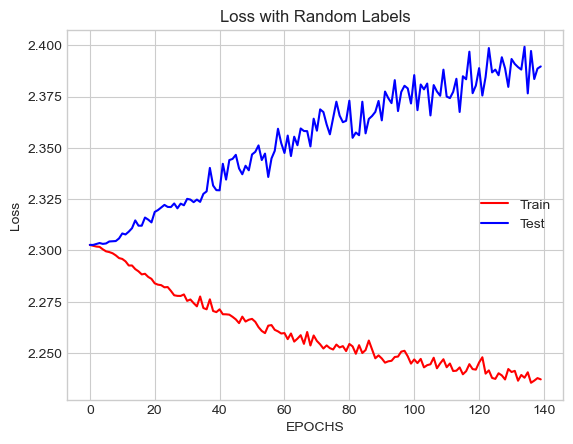

In [7]:
plt.plot(cList, trainLossList, 'r', label='Train')
plt.plot(cList, testLossList, 'b', label='Test')
plt.title("Loss with Random Labels")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend(loc="center right")
plt.savefig('LosswithRandonLabels.jpg')
plt.show()